# 분류 분석

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/gym_data.xlsx', engine = 'openpyxl')
df.head()
# 피트니스센터 회원권 등록여부, 참여자의 나이, 연봉, 주당 평균 운동시간

,Enroll,Age,Income,Hours
0,1,26,18000,14
1,0,43,13000,9
2,1,55,42000,16
3,1,55,100000,13
4,0,55,13000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Enroll  1000 non-null   int64
 1   Age     1000 non-null   int64
 2   Income  1000 non-null   int64
 3   Hours   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
df['Enroll'].unique()

array([1, 0])

In [ ]:
df['Enroll'].value_counts()

Enroll
0    597
1    403
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Enroll', 'Age', 'Income', 'Hours'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.loc[:,['Age', 'Income', 'Hours']]
y = df['Enroll']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (1000, 3)
y 데이터:  (1000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (700, 3)
test 데이터:  (300, 3)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train)
X_test_scale = standard.transform(X_test)

### 최적의 k값 찾기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 최적의 k값 찾기
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scale, y_train)
  # 정확도
  print("k값: ", k)
  print("훈련점수: ", knn.score(X_train_scale, y_train))
  print("테스트점수: ", knn.score(X_test_scale, y_test))

k값:  1
훈련점수:  1.0
테스트점수:  0.8933333333333333
k값:  2
훈련점수:  0.93
테스트점수:  0.8633333333333333
k값:  3
훈련점수:  0.9385714285714286
테스트점수:  0.91
k값:  4
훈련점수:  0.9271428571428572
테스트점수:  0.8966666666666666
k값:  5
훈련점수:  0.9328571428571428
테스트점수:  0.9333333333333333
k값:  6
훈련점수:  0.9157142857142857
테스트점수:  0.9266666666666666
k값:  7
훈련점수:  0.9185714285714286
테스트점수:  0.9366666666666666
k값:  8
훈련점수:  0.9071428571428571
테스트점수:  0.9266666666666666
k값:  9
훈련점수:  0.9157142857142857
테스트점수:  0.93
k값:  10
훈련점수:  0.9028571428571428
테스트점수:  0.9133333333333333


In [ ]:
train_score = []
test_score = []
diff_score = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  # 모델 훈련
  knn.fit(X_train_scale, y_train)
  # 점수 확인
  print("k = ", k)
  train_score.append(knn.score(X_train_scale, y_train))
  test_score.append(knn.score(X_test_scale, y_test))
  diff_score.append(knn.score(X_train_scale, y_train) - knn.score(X_test_scale, y_test))

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10


In [ ]:
score_df = pd.DataFrame({'train_score': train_score,
                         'test_score': test_score,
                         'diff_score': diff_score})
score_df

,train_score,test_score,diff_score
0,1.000000,0.893333,0.106667
1,0.930000,0.863333,0.066667
2,0.938571,0.910000,0.028571
3,0.927143,0.896667,0.030476
4,0.932857,0.933333,-0.000476
5,0.915714,0.926667,-0.010952
6,0.918571,0.936667,-0.018095
7,0.907143,0.926667,-0.019524
8,0.915714,0.930000,-0.014286
9,0.902857,0.913333,-0.010476


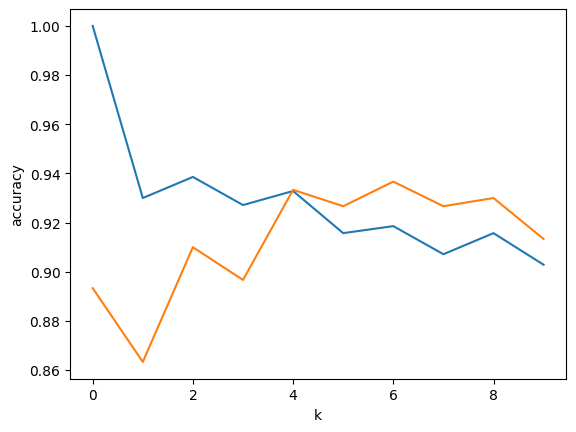

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 최종 모델
from sklearn.neighbors import KNeighborsClassifier
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(best_model.score(X_train_scale, y_train))
print(best_model.score(X_test_scale, y_test))

0.9328571428571428
0.9333333333333333


In [ ]:
y_train_pred = best_model.predict(X_train_scale)
y_test_pred = best_model.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 1 0 0]
[0 1 0 0 0]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 1 0 0]
[0 0 1 0 0]


In [ ]:
y_train_proba = best_model.predict_proba(X_train_scale)
y_test_proba = best_model.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]]
[[1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[386  31]
 [ 16 267]]
[[169  11]
 [  9 111]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       417
           1       0.90      0.94      0.92       283

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.  0.8 0.6 0.4 0.2 0. ]
fpr: [0.02 0.05 0.06 0.12 0.27 1.  ]
tpr: [0.42 0.79 0.92 0.97 0.98 1.  ]


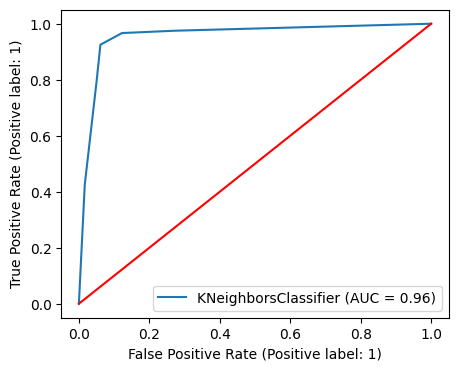

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9554629629629631
0.9554629629629631


### 성능 개선

In [ ]:
# 회원권 등록하지 않은 사람들의 특성을 파악하여 회원 유치하는 것이 중요함
# 회원권 등록 안함이라고 예측하는 것이 중요
# = 회원권 등록했는데 안했다고 예측하는 것이 적은 것이 좋음 (FN↓)
# => TP / (TP + FN) = 재현율(민감도) 중요

In [ ]:
# 재현율을 높이는 것이 목표
y_test_proba[:,0][:5]

array([1. , 0.8, 0. , 1. , 0.8])

In [ ]:
y_test_pred[:5]

array([0, 0, 1, 0, 0])

In [ ]:
y_test_pred_new = np.where(y_test_proba[:,0] > 0.25, 0, 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_new))
# 재현율 증가

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       180
           1       0.91      0.79      0.85       120

    accuracy                           0.89       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.89      0.89      0.89       300



### 새로운 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/gym_score.xlsx', engine = 'openpyxl')
df.head()

,Age,Income,Hours
0,22,33000,5
1,23,65000,9
2,23,17000,15
3,24,21000,16
4,64,109000,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     23 non-null     int64
 1   Income  23 non-null     int64
 2   Hours   23 non-null     int64
dtypes: int64(3)
memory usage: 680.0 bytes


In [ ]:
df.describe()

,Age,Income,Hours
count,23.000000,23.000000,23.000000
mean,40.391304,60652.173913,11.434783
std,12.844309,28009.103546,6.604586
min,22.000000,17000.000000,3.000000
25%,28.000000,37000.000000,5.500000
50%,42.000000,65000.000000,9.000000
75%,48.500000,87000.000000,16.500000
max,64.000000,109000.000000,23.000000


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.loc[:,['Age', 'Income', 'Hours']]

print("X 데이터: ", X.shape)

X 데이터:  (23, 3)


In [ ]:
# 표준화
X_scale = standard.transform(X)

In [ ]:
y_score = best_model.predict(X_scale)

In [ ]:
new_data = pd.concat([X, pd.Series(y_score)], axis = 1)
new_data.head()

,Age,Income,Hours,0
0,22,33000,5,0
1,23,65000,9,1
2,23,17000,15,0
3,24,21000,16,0
4,64,109000,20,1


In [ ]:
new_data = new_data.rename(columns = {0: 'y_score'})
new_data

,Age,Income,Hours,y_score
0,22,33000,5,0
1,23,65000,9,1
2,23,17000,15,0
3,24,21000,16,0
4,64,109000,20,1
5,39,67000,12,0
6,47,69000,21,0
7,37,34000,5,0
8,50,25000,9,0
9,35,87000,22,0


In [ ]:
class_yn = new_data.groupby(by = 'y_score')

In [ ]:
# 반복문으로 그룹 객체 확인
for i, j in class_yn:
  print("그룹의 이름: ", i) # 그룹의 이름
  print(j.head()) # 그룹에 해당하는 데이터

그룹의 이름:  0
   Age  Income  Hours  y_score
0   22   33000      5        0
2   23   17000     15        0
3   24   21000     16        0
5   39   67000     12        0
6   47   69000     21        0
그룹의 이름:  1
    Age  Income  Hours  y_score
1    23   65000      9        1
4    64  109000     20        1
12   57   56000     11        1
15   61   27000      9        1
18   54   87000      4        1


In [ ]:
class_y = class_yn.get_group(1)
class_n = class_yn.get_group(0)

In [ ]:
print(class_y.shape, class_n.shape)

(7, 4) (16, 4)


In [ ]:
print(class_y.describe())
print(class_n.describe())

             Age         Income      Hours  y_score
count   7.000000       7.000000   7.000000      7.0
mean   50.714286   76714.285714  10.857143      1.0
std    13.744263   29193.117258   5.756983      0.0
min    23.000000   27000.000000   4.000000      1.0
25%    48.000000   60500.000000   7.500000      1.0
50%    54.000000   87000.000000   9.000000      1.0
75%    59.000000   96500.000000  14.000000      1.0
max    64.000000  109000.000000  20.000000      1.0
             Age        Income      Hours  y_score
count  16.000000     16.000000  16.000000     16.0
mean   35.875000  53625.000000  11.687500      0.0
std     9.742518  25231.924223   7.106042      0.0
min    22.000000  17000.000000   3.000000      0.0
25%    24.750000  33750.000000   5.000000      0.0
50%    38.000000  52000.000000  10.000000      0.0
75%    44.250000  67500.000000  17.250000      0.0
max    50.000000  97000.000000  23.000000      0.0


In [ ]:
# 독립표본 t 검정
# 등분산 검정
from scipy.stats import levene
print(levene(class_n['Age'], class_y['Age']))
print(levene(class_n['Income'], class_y['Income']))
print(levene(class_n['Hours'], class_y['Hours']))

LeveneResult(statistic=0.05483483234550503, pvalue=0.817122140638606)
LeveneResult(statistic=0.003142749228565524, pvalue=0.9558237900981071)
LeveneResult(statistic=0.9636077836320205, pvalue=0.33745441904384843)


In [ ]:
# 등분산 가정
from scipy.stats import ttest_ind
print("Age: ", class_n['Age'].mean(), "vs.", class_y['Age'].mean())
print(ttest_ind(class_n['Age'], class_y['Age'], equal_var=True))

print("Income: ", class_n['Income'].mean(), "vs.", class_y['Income'].mean())
print(ttest_ind(class_n['Income'], class_y['Income'], equal_var=True))

print("Hours: ", class_n['Hours'].mean(), "vs.", class_y['Hours'].mean())
print(ttest_ind(class_n['Hours'], class_y['Hours'], equal_var=True))

Age:  35.875 vs. 50.714285714285715
TtestResult(statistic=-2.967475959148584, pvalue=0.007347433733680799, df=21.0)
Income:  53625.0 vs. 76714.28571428571
TtestResult(statistic=-1.9281959964770075, pvalue=0.0674611792587549, df=21.0)
Hours:  11.6875 vs. 10.857142857142858
TtestResult(statistic=0.27153374230163485, pvalue=0.7886320062315595, df=21.0)


## KNN - 타이타닉데이터

### 데이터 준비

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# deck => 결측치 50% 이상이어서 열 삭제
# embark_town  & embarked => 같은 변수이어서 하나 열 삭제
# age => 편의상 결측치 제거 (대체-평균, 중앙값, 모델 예측값)
# embarked => 결측치 대체(최빈값)

In [ ]:
(891-714)/891

0.19865319865319866

In [ ]:
df[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [ ]:
df['deck'].value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [ ]:
# 열 삭제
df_new = df.drop(['deck', 'embark_town'], axis = 1)

In [ ]:
# 결측치 삭제
df_new = df_new.dropna(subset = ['age'], how = 'any', axis = 0)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

embarked
S      554
C      130
Q       28
NaN      2
Name: count, dtype: int64

In [ ]:
df_new['embarked'].value_counts().idxmax()

'S'

In [ ]:
mode_embarked = df_new['embarked'].value_counts().idxmax()

In [ ]:
# 결측치 대체
df_new['embarked'] = df_new['embarked'].fillna(mode_embarked)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

embarked
S    556
C    130
Q     28
Name: count, dtype: int64

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
# 특성 선택
df_new = df_new[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 데이터 분할
# 전체 데이터
X = df_new.iloc[:,1:]
y = df_new['survived']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (714, 6)
y 데이터:  (714,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (499, 6)
test 데이터:  (215, 6)


In [ ]:
# sex => 원핫인코딩
# embarked => 원핫인코딩

In [ ]:
X_train_dm = pd.get_dummies(X_train[['sex', 'embarked']])
X_train_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,False,True,False,False,True
58,True,False,False,False,True
57,False,True,True,False,False
94,False,True,False,False,True
209,False,True,True,False,False


In [ ]:
# 더미변수 함정 => 선형 회귀 - 다중공선성 문제 => 범주의 개수 - 1 개만큼의 더미변수 생성

In [ ]:
X_test_dm = pd.get_dummies(X_test[['sex', 'embarked']])
X_test_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,False,True,False,False,True
407,False,True,False,False,True
53,True,False,False,False,True
369,True,False,True,False,False
818,False,True,False,False,True


In [ ]:
X_train = pd.concat([X_train, X_train_dm], axis = 1)
X_train.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,male,21.0,0,0,S,False,True,False,False,True
58,2,female,5.0,1,2,S,True,False,False,False,True
57,3,male,28.5,0,0,C,False,True,True,False,False
94,3,male,59.0,0,0,S,False,True,False,False,True
209,1,male,40.0,0,0,C,False,True,True,False,False


In [ ]:
X_test = pd.concat([X_test, X_test_dm], axis = 1)
X_test.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,male,42.0,0,0,S,False,True,False,False,True
407,2,male,3.0,1,1,S,False,True,False,False,True
53,2,female,29.0,1,0,S,True,False,False,False,True
369,1,female,24.0,0,0,C,True,False,True,False,False
818,3,male,43.0,0,0,S,False,True,False,False,True


In [ ]:
X_train = X_train.drop(['sex', 'embarked'], axis = 1)
X_train.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,21.0,0,0,False,True,False,False,True
58,2,5.0,1,2,True,False,False,False,True
57,3,28.5,0,0,False,True,True,False,False
94,3,59.0,0,0,False,True,False,False,True
209,1,40.0,0,0,False,True,True,False,False


In [ ]:
X_test = X_test.drop(['sex', 'embarked'], axis = 1)
X_test.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,42.0,0,0,False,True,False,False,True
407,2,3.0,1,1,False,True,False,False,True
53,2,29.0,1,0,True,False,False,False,True
369,1,24.0,0,0,True,False,True,False,False
818,3,43.0,0,0,False,True,False,False,True


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[ 0.9357 -0.6292 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -1.7061  0.5754  1.7709  1.3371 -1.3371 -0.4659 -0.2096  0.5318]
 [ 0.9357 -0.1244 -0.5462 -0.495  -0.7479  0.7479  2.1463 -0.2096 -1.8805]
 [ 0.9357  1.9284 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-1.4405  0.6496 -0.5462 -0.495  -0.7479  0.7479  2.1463 -0.2096 -1.8805]]
[[-0.2524  0.7842 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -1.8407  0.5754  0.638  -0.7479  0.7479 -0.4659 -0.2096  0.5318]
 [-0.2524 -0.0907  0.5754 -0.495   1.3371 -1.3371 -0.4659 -0.2096  0.5318]
 [-1.4405 -0.4273 -0.5462 -0.495   1.3371 -1.3371  2.1463 -0.2096 -1.8805]
 [ 0.9357  0.8515 -0.5462 -0.495  -0.7479  0.7479 -0.4659 -0.2096  0.5318]]


In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# 기본값 k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))

0.8517034068136272
0.786046511627907


### 최적의 k값 찾기

In [ ]:
# 최적의 k값 찾기
train_score = []
test_score = []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scale, y_train)
  # 정확도
  print("k값: ", k)
  print("훈련점수: ", knn.score(X_train_scale, y_train))
  print("테스트점수: ", knn.score(X_test_scale, y_test))
  train_score.append(knn.score(X_train_scale, y_train))
  test_score.append(knn.score(X_test_scale, y_test))

k값:  1
훈련점수:  0.9398797595190381
테스트점수:  0.7255813953488373
k값:  2
훈련점수:  0.875751503006012
테스트점수:  0.772093023255814
k값:  3
훈련점수:  0.8797595190380761
테스트점수:  0.7906976744186046
k값:  4
훈련점수:  0.8517034068136272
테스트점수:  0.7953488372093023
k값:  5
훈련점수:  0.8517034068136272
테스트점수:  0.786046511627907
k값:  6
훈련점수:  0.845691382765531
테스트점수:  0.7906976744186046
k값:  7
훈련점수:  0.8577154308617234
테스트점수:  0.8093023255813954
k값:  8
훈련점수:  0.8517034068136272
테스트점수:  0.786046511627907
k값:  9
훈련점수:  0.8517034068136272
테스트점수:  0.7906976744186046
k값:  10
훈련점수:  0.8396793587174348
테스트점수:  0.7813953488372093


In [ ]:
train_score = []
test_score = []
diff_score = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  # 모델 훈련
  knn.fit(X_train_scale, y_train)
  # 점수 확인
  print("k = ", k)
  train_score.append(knn.score(X_train_scale, y_train))
  test_score.append(knn.score(X_test_scale, y_test))
  diff_score.append(knn.score(X_train_scale, y_train) - knn.score(X_test_scale, y_test))

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10


In [ ]:
score_df = pd.DataFrame({'train_score': train_score,
                         'test_score': test_score,
                         'diff_score': diff_score})
score_df

,train_score,test_score,diff_score
0,0.939880,0.725581,0.214298
1,0.875752,0.772093,0.103658
2,0.879760,0.790698,0.089062
3,0.851703,0.795349,0.056355
4,0.851703,0.786047,0.065657
5,0.845691,0.790698,0.054994
6,0.857715,0.809302,0.048413
7,0.851703,0.786047,0.065657
8,0.851703,0.790698,0.061006
9,0.839679,0.781395,0.058284


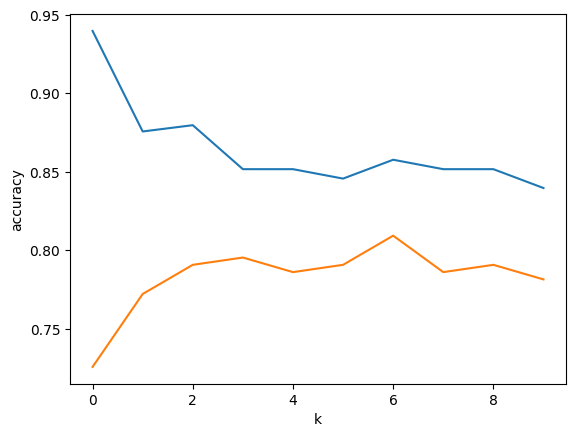

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# k = 7
best_model = KNeighborsClassifier(n_neighbors=7)
best_model.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# 정확도
print(best_model.score(X_train_scale, y_train))
print(best_model.score(X_test_scale, y_test))

0.8577154308617234
0.8093023255813954


In [ ]:
y_train_pred = best_model.predict(X_train_scale)
y_test_pred = best_model.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 0 0 1]
[0 1 0 0 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 1 1 1 0]
[0 1 1 1 0]


In [ ]:
y_train_proba = best_model.predict_proba(X_train_scale)
y_test_proba = best_model.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[1.     0.    ]
 [0.1429 0.8571]
 [0.8571 0.1429]
 [1.     0.    ]
 [0.2857 0.7143]]
[[0.8571 0.1429]
 [0.1429 0.8571]
 [0.2857 0.7143]
 [0.     1.    ]
 [0.8571 0.1429]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[271  27]
 [ 44 157]]
[[108  18]
 [ 23  66]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       298
           1       0.85      0.78      0.82       201

    accuracy                           0.86       499
   macro avg       0.86      0.85      0.85       499
weighted avg       0.86      0.86      0.86       499

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       126
           1       0.79      0.74      0.76        89

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.   0.86 0.71 0.57 0.43 0.29 0.14 0.  ]
fpr: [0.02 0.05 0.1  0.14 0.21 0.44 0.76 1.  ]
tpr: [0.34 0.53 0.63 0.74 0.79 0.9  0.96 1.  ]


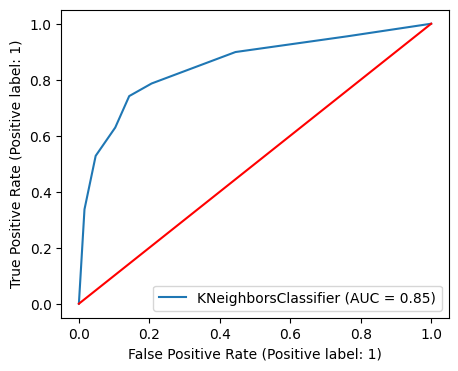

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8519261637239166
0.8519261637239166


### 더미변수 - 기준범주 제외(성능 차이 없음)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 최종 모델 기준으로 성능 비교
df_new = df.drop(['deck', 'embark_town'], axis = 1)
df_new = df_new.dropna(subset = ['age'], how = 'any', axis = 0)
mode_embarked = df_new['embarked'].value_counts().idxmax()
df_new['embarked'] = df_new['embarked'].fillna(mode_embarked)
df_new = df_new[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
sex_dm = pd.get_dummies(df_new['sex'], drop_first=True) # 기준범주 제외
df_new = pd.concat([df_new, sex_dm], axis = 1)
embarked_dm = pd.get_dummies(df_new['embarked'], prefix = 'town', drop_first=True) # 기준범주 제외
df_new = pd.concat([df_new, embarked_dm], axis = 1)
df_new = df_new.drop(['sex', 'embarked'], axis = 1)
X = df_new.iloc[:,1:]
y = df_new['survived']
print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scale, y_train)
# 정확도
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))
y_train_pred = knn.predict(X_train_scale)
y_test_pred = knn.predict(X_test_scale)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

X 데이터:  (714, 7)
y 데이터:  (714,)
train 데이터:  (499, 7)
test 데이터:  (215, 7)
0.8577154308617234
0.8093023255813954
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       298
           1       0.85      0.79      0.82       201

    accuracy                           0.86       499
   macro avg       0.86      0.85      0.85       499
weighted avg       0.86      0.86      0.86       499

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       126
           1       0.79      0.74      0.76        89

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



## NB

### 조건부확률

In [ ]:
0.5 * 0.2 / 0.6

0.16666666666666669

### 스팸 메일 분류 개념 연습

In [ ]:
normal_mail = pd.DataFrame({'word': ['사랑하는', '친구에게', '점심', '돈'],
                                             'count': [8, 5, 3, 1]})
normal_mail

,word,count
0,사랑하는,8
1,친구에게,5
2,점심,3
3,돈,1


In [ ]:
spam_mail = pd.DataFrame({'word': ['사랑하는', '친구에게', '점심', '돈'],
                                             'count': [2, 1, 0, 4]})
spam_mail

,word,count
0,사랑하는,2
1,친구에게,1
2,점심,0
3,돈,4


In [ ]:
# 단어가 나올 확률
# 정상 메일
normal_mail['p'] = round(normal_mail['count'] / sum(normal_mail['count']), 2)
normal_mail

,word,count,p
0,사랑하는,8,0.47
1,친구에게,5,0.29
2,점심,3,0.18
3,돈,1,0.06


In [ ]:
# 스팸 메일
spam_mail['p'] = round(spam_mail['count'] / sum(spam_mail['count']), 2)
spam_mail

,word,count,p
0,사랑하는,2,0.29
1,친구에게,1,0.14
2,점심,0,0.00
3,돈,4,0.57


In [ ]:
# 사전 확률
normal_mail_count = 8; spam_mail_count = 4
normal_mail_p = round(normal_mail_count / (normal_mail_count + spam_mail_count), 2)
spam_mail_p = round(spam_mail_count / (normal_mail_count + spam_mail_count), 2)
print(normal_mail_p, spam_mail_p)

0.67 0.33


In [ ]:
# 사랑하는 친구에게 라는 메일이 정상 메일일 확률
round(normal_mail_p * normal_mail.iloc[0,2] * normal_mail.iloc[1,2], 2)

0.09

In [ ]:
# 사랑하는 친구에게 라는 메일이 스팸 메일일 확률
round(spam_mail_p * spam_mail.iloc[0,2] * spam_mail.iloc[1,2], 2)

0.01

### 데이터 불러오기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/census_data.xlsx', engine = 'openpyxl')
df.head()
# 결혼여부, 여성여부, 백인여부, 연령군, 대학교육여부, 소득빈곤여부
# 연령군 1: 18~24, 2: 25~34, 3: 35~44, 4: 45~54, 5: 55~

,Married,Female,White,Age,Edu,Poverty
0,Y,N,Y,1,N,0
1,Y,N,Y,1,N,0
2,Y,N,Y,1,Y,0
3,N,N,Y,1,Y,1
4,N,N,N,1,N,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Married  9980 non-null   object
 1   Female   9980 non-null   object
 2   White    9980 non-null   object
 3   Age      9980 non-null   int64 
 4   Edu      9980 non-null   object
 5   Poverty  9980 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 467.9+ KB


In [ ]:
# y 변수 검토
df['Poverty'].unique()

array([0, 1])

In [ ]:
df['Poverty'].value_counts()

Poverty
1    7788
0    2192
Name: count, dtype: int64

In [ ]:
df['Poverty'].value_counts(normalize=True)

Poverty
1    0.780361
0    0.219639
Name: proportion, dtype: float64

In [ ]:
df.head()

,Married,Female,White,Age,Edu,Poverty
0,Y,N,Y,1,N,0
1,Y,N,Y,1,N,0
2,Y,N,Y,1,Y,0
3,N,N,Y,1,Y,1
4,N,N,N,1,N,1


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['Poverty']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (9980, 5)
y 데이터:  (9980,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (6986, 5)
test 데이터:  (2994, 5)


In [ ]:
dummy_vars = ['Married', 'Female', 'White', 'Edu']
X_train_dm = pd.get_dummies(X_train[dummy_vars])
X_train_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
1777,True,False,False,True,False,True,True,False
6060,True,False,False,True,False,True,False,True
751,True,False,True,False,False,True,True,False
9719,True,False,False,True,False,True,False,True
4023,True,False,False,True,False,True,True,False


In [ ]:
X_test_dm = pd.get_dummies(X_test[dummy_vars])
X_test_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
1253,True,False,False,True,False,True,False,True
8224,True,False,True,False,False,True,True,False
1658,True,False,False,True,False,True,True,False
7733,True,False,False,True,False,True,True,False
1441,True,False,False,True,False,True,True,False


In [ ]:
X_train_dm = X_train_dm.iloc[:,[1,3,5,7]]
X_train_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
1777,False,True,True,False
6060,False,True,True,True
751,False,False,True,False
9719,False,True,True,True
4023,False,True,True,False


In [ ]:
X_test_dm = X_test_dm.iloc[:,[1,3,5,7]]
X_test_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
1253,False,True,True,True
8224,False,False,True,False
1658,False,True,True,False
7733,False,True,True,False
1441,False,True,True,False


In [ ]:
X_train.head()

,Married,Female,White,Age,Edu
1777,N,Y,Y,1,N
6060,N,Y,Y,3,Y
751,N,N,Y,1,N
9719,N,Y,Y,5,Y
4023,N,Y,Y,2,N


In [ ]:
# 더미변수 변환된 데이터와 합치기
X_train = pd.concat([X_train_dm, X_train['Age']], axis = 1)
X_train.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
1777,False,True,True,False,1
6060,False,True,True,True,3
751,False,False,True,False,1
9719,False,True,True,True,5
4023,False,True,True,False,2


In [ ]:
# 더미변수 변환된 데이터와 합치기
X_test = pd.concat([X_test_dm, X_test['Age']], axis = 1)
X_test.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
1253,False,True,True,True,1
8224,False,False,True,False,5
1658,False,True,True,False,1
7733,False,True,True,False,4
1441,False,True,True,False,1


### 모델 훈련 및 평가 - CategoricalNB

In [ ]:
# 모델 훈련
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# 정확도
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.7948754652161466
0.8002672010688042


In [ ]:
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
y_train_proba = nb.predict_proba(X_train)
y_test_proba = nb.predict_proba(X_test)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.0007 0.9993]
 [0.0416 0.9584]
 [0.0024 0.9976]
 [0.0388 0.9612]
 [0.0076 0.9924]]
[[0.0017 0.9983]
 [0.0525 0.9475]
 [0.0007 0.9993]
 [0.0233 0.9767]
 [0.0007 0.9993]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[ 916  620]
 [ 813 4637]]
[[ 384  272]
 [ 326 2012]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1536
           1       0.88      0.85      0.87      5450

    accuracy                           0.79      6986
   macro avg       0.71      0.72      0.71      6986
weighted avg       0.80      0.79      0.80      6986

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       656
           1       0.88      0.86      0.87      2338

    accuracy                           0.80      2994
   macro avg       0.71      0.72      0.72      2994
weighted avg       0.81      0.80      0.80      2994



In [ ]:
# ROC - 1 기준
y_test_proba1 = nb.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[1.   1.   1.   1.   1.   1.   1.   1.   0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.97 0.97 0.97
 0.97 0.97 0.97 0.96 0.96 0.96 0.96 0.96 0.95 0.94 0.94 0.94 0.94 0.94
 0.93 0.92 0.92 0.91 0.89 0.89 0.88 0.88 0.87 0.87 0.84 0.83 0.83 0.8
 0.78 0.77 0.74 0.73 0.71 0.69 0.68 0.68 0.66 0.61 0.61 0.59 0.53 0.52
 0.52 0.5  0.48 0.46 0.44 0.38 0.32 0.3  0.24]
fpr: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.03 0.03 0.04 0.04 0.04 0.04 0.05 0.06 0.06 0.06 0.07 0.07
 0.08 0.08 0.08 0.08 0.09 0.09 0.1  0.1  0.12 0.12 0.12 0.14 0.14 0.15
 0.15 0.17 0.17 0.18 0.21 0.21 0.22 0.22 0.23 0.24 0.25 0.28 0.35 0.36
 0.41 0.49 0.5  0.52 0.56 0.57 0.68 0.83 1.  ]
tpr: [0.01 0.04 0.05 0.06 0.11 0.17 0.18 0.19 0.19 0.24 0.27 0.27 0.28 0.29
 0.29 0.3  0.3  0.31 0.33 0.35 0.35 0.38 0.38 0.39 0.41 0.44 0.44 0.44
 0.45 0.45 0.46 0.47 0.49 0.5  0.52 0.52 0.54 0

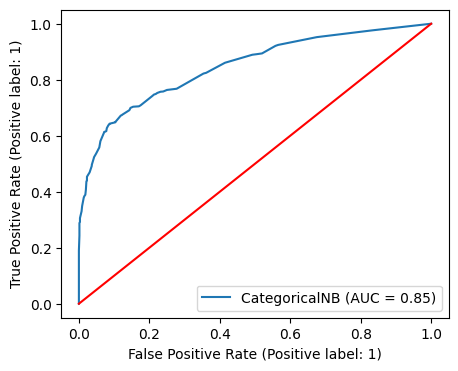

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8458797779006446
0.8458797779006446


### 성능 개선

In [ ]:
# 소득이 빈곤 수준인 사람들의 특성을 이해하는 것이 중요함
# 빈곤이라고 잘 예측하는 것이 중요
# = 빈곤이라고 예측한 것 중에서 빈곤이 아닌 것이 적은 것이 좋음 (FP↓)
# => TP / (TP + FP) = 정밀도가 중요

In [ ]:
# 정밀도를 높이는 것이 목표
y_test_proba[:,1]

array([0.9983, 0.9475, 0.9993, ..., 0.9735, 0.5336, 0.984 ])

In [ ]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test_pred_new = np.where(y_test_proba[:,1] > 0.75, 1, 0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       656
           1       0.88      0.86      0.87      2338

    accuracy                           0.80      2994
   macro avg       0.71      0.72      0.72      2994
weighted avg       0.81      0.80      0.80      2994

              precision    recall  f1-score   support

           0       0.44      0.83      0.58       656
           1       0.94      0.70      0.80      2338

    accuracy                           0.73      2994
   macro avg       0.69      0.77      0.69      2994
weighted avg       0.83      0.73      0.75      2994

